# Graded Practical Session

## Exercise #1: Supervised Learning

In a regression problem, we have to predict a continuous dependent variable, like a price, from independent variables.
We will use the dataset Auto MPG (https://archive.ics.uci.edu/ml/datasets/auto+mpg) and build some models to predict the energy efficiency (MPG) of vehicles of the end of 1970’s and the beginning of 1980’s.
The independent variables (attributes) in this dataset are : # of cylinders, displacement, horse power, weight, acceleration, model year, origin, car name.
1. Download the dataset at:
http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
2. Read the data with pandas.
3. Clean the data by possibly removing rows with unknown values (dropna with pandas).
4. Visualize the data with the most adapted techniques to have a glance about the correlation of
some pairs of attributes.
5. Divide the data into a training set and a test set (80% training, 20% test).
6. Normalize the data (preprocessing by normalization).
7. Train a linear regression model first, then train a Deep Neuron Network with two dense
layers with relu activation functions.
For the neuron network, use the optimizer Adam, and test the loss functions mean_absolute_error and mean_squared_error.
8. Compare the results of the different models (linear regression and MLP) on the test set.

For steps 2 to 8, write Python codes.

In [1]:
# 2. Read the data with pandas.

import pandas as pd

# Define the column names
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']

# Read the data
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
# 3. Clean the data by possibly removing rows with unknown values (dropna with pandas).

# Replace '?' by NaN values (horsepower	Feature	Continuous				missing : yes)
data['horsepower'].replace('?', pd.NA, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# 4. Visualize the data with the most adapted techniques to have a glance about the correlation of some pairs of attributes.

import seaborn as sns
import matplotlib.pyplot as plt

# We drop the car_name column because it is not useful for the visualization
data_num = data.drop(['car_name'], axis=1)

/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


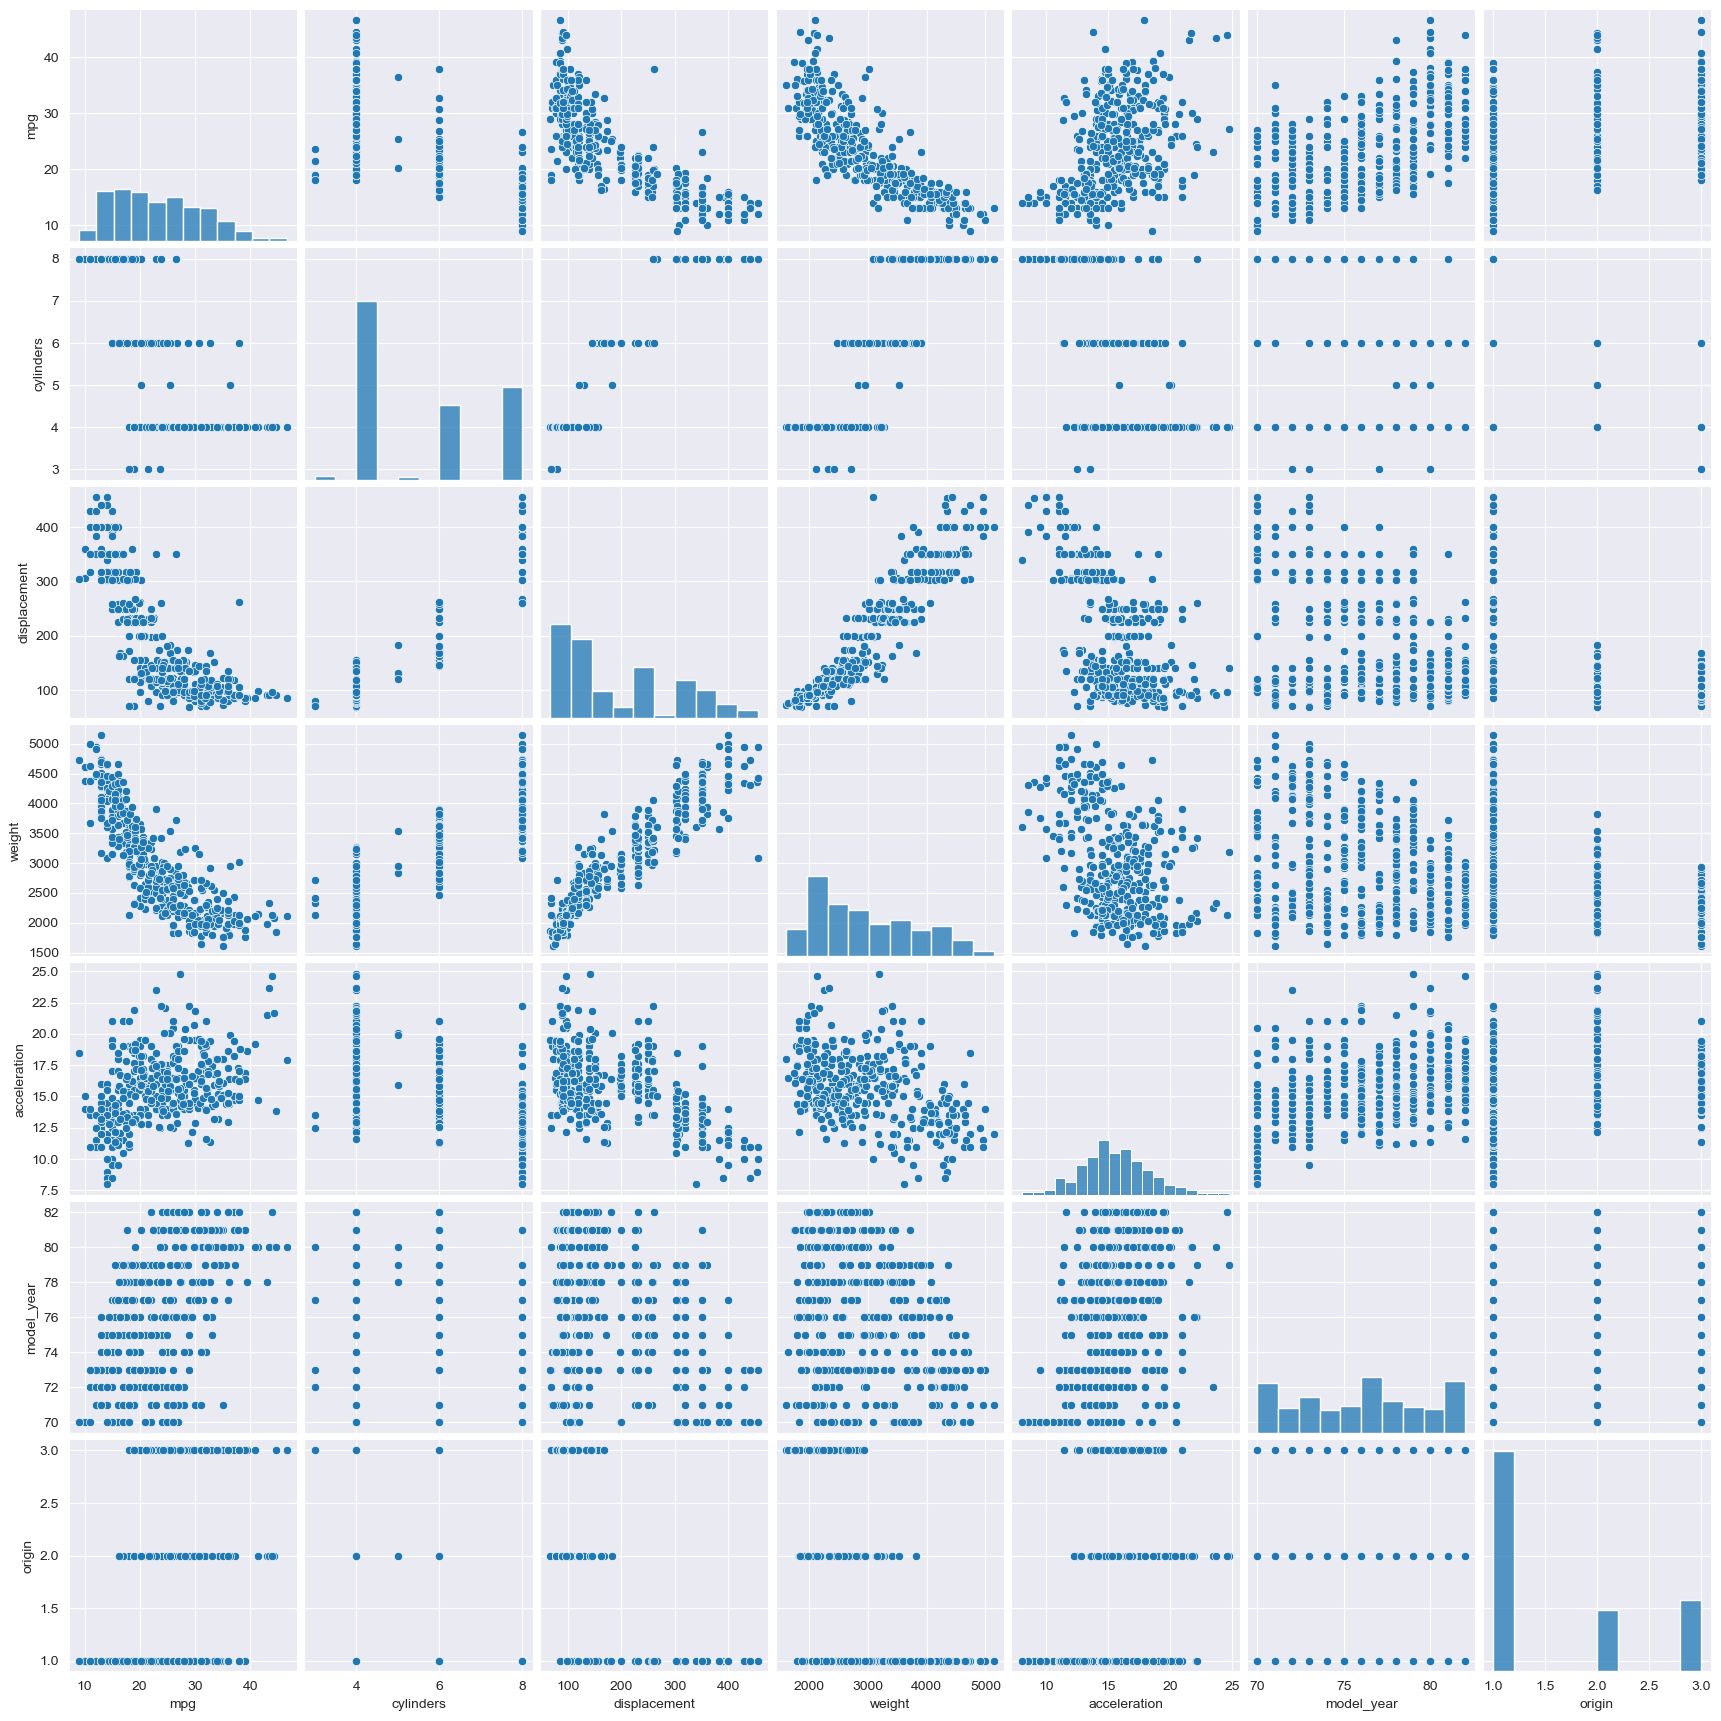

In [4]:
# Pairplot to visualize the correlation between the attributes
sns.pairplot(data_num)

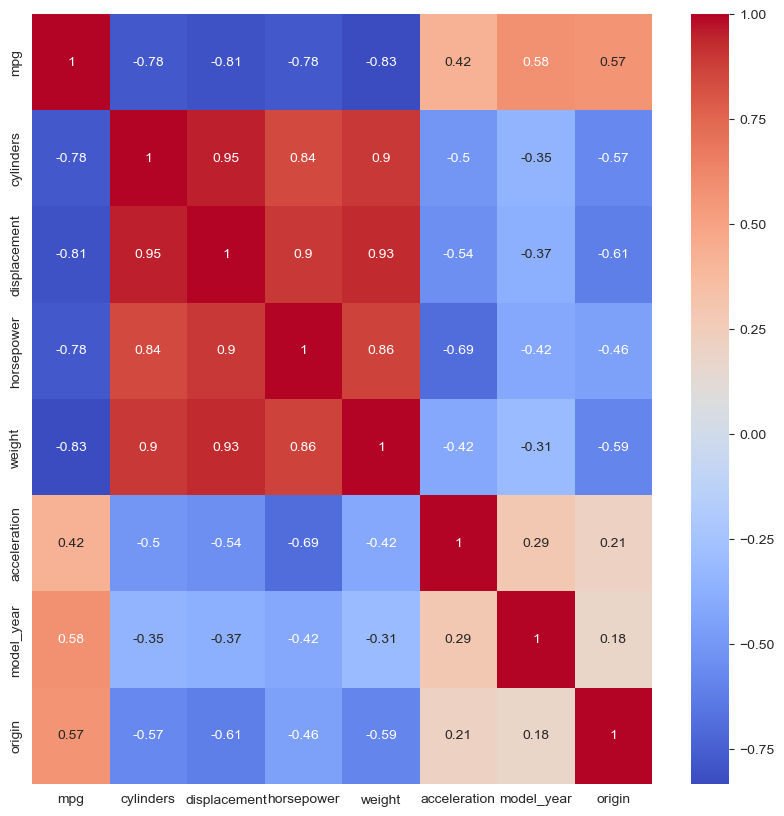

In [5]:
# Heatmap of the correlation between the attributes
plt.figure(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')
plt.show()

On remarque que les attributs les plus corrélés sont :
- mpg et model_year
- mgp et origin
- cylinders et displacement
- cylinders et horsepower
- cylinders et weight
- displacement et horsepower
- displacement et weight
- horsepower et weight

In [6]:
# 5. Divide the data into a training set and a test set (80% training, 20% test).

from sklearn.model_selection import train_test_split

# Split the data into X and y
X = data.drop(['mpg', 'car_name', 'origin'], axis=1)
y = data['mpg']  # Target

# Slit the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # We can use also random_state=??

In [7]:
# 6. Normalize the data (preprocessing by normalization).

from sklearn.preprocessing import StandardScaler

# Normalize the data, with the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

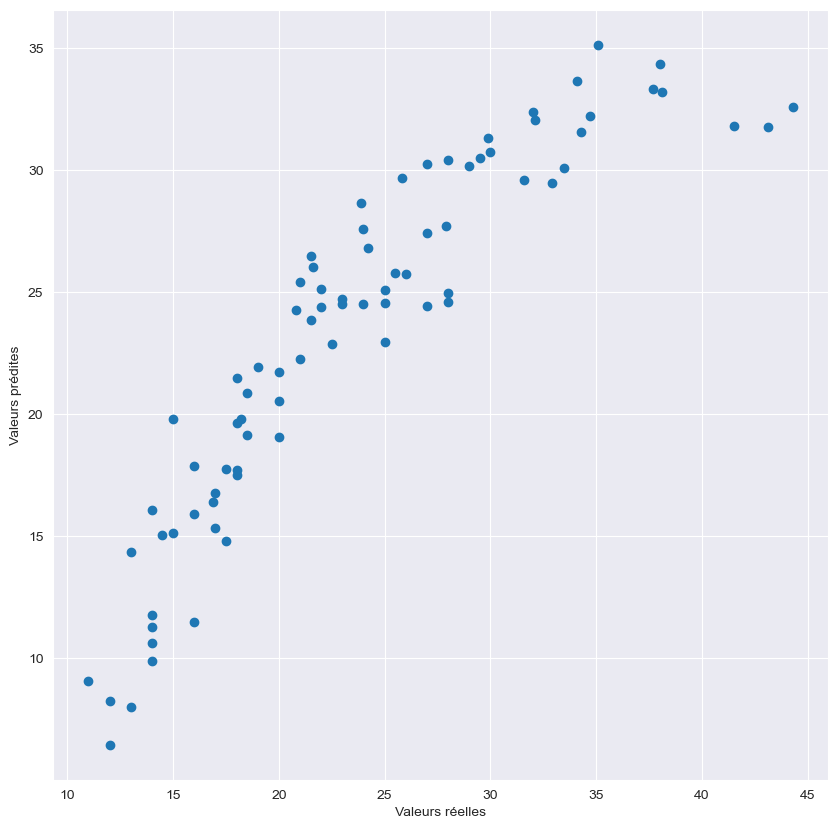

In [8]:
# 7. Train a linear regression model first, then train a Deep Neuron Network with two dense layers with relu activation functions.

from sklearn.linear_model import LinearRegression

# Training the model linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Plot the predictions
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

Epoch 1/100


2023-12-19 17:15:40.406018: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-19 17:15:40.406049: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-19 17:15:40.406055: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-19 17:15:40.406092: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-19 17:15:40.406110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 1/10 [==>...........................] - ETA: 2s - loss: 679.7599

2023-12-19 17:15:40.750673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 14ms/step - loss: 611.5008
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 594.9094
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 578.5769
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 562.2126
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 543.1186
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 517.9244
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 497.3181
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 481.7435
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 470.5674
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 466.0667
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 459.6552
Epoch 12/100
10/10 [==============================] - 0s 6ms/step - loss: 448.3161
Epoch 13/100
10/10 [====

2023-12-19 17:15:47.387589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


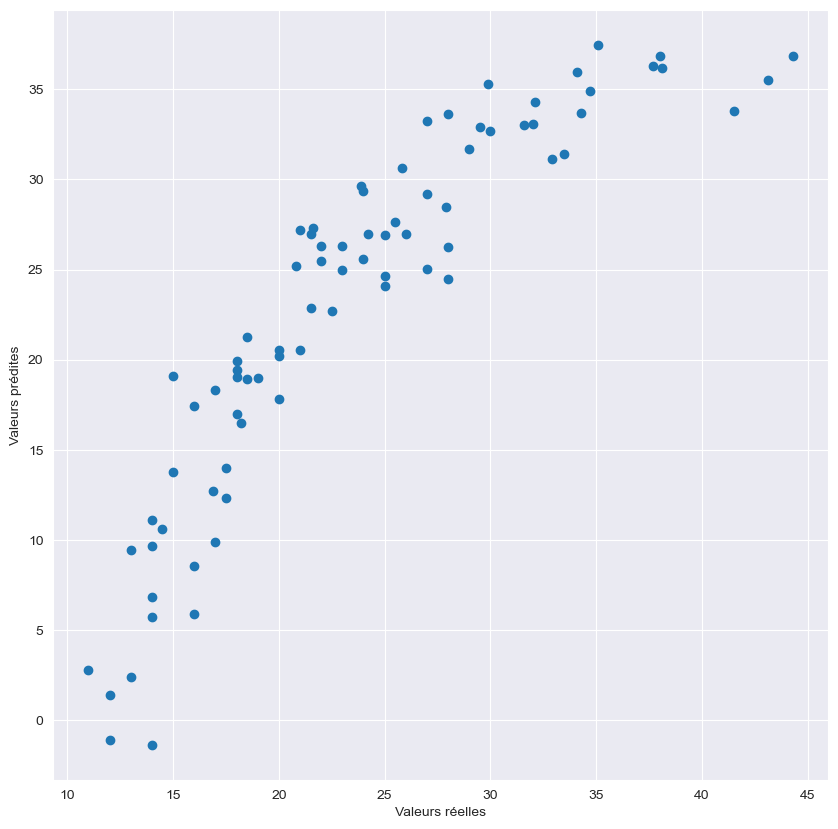

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100)

y_pred_m = model.predict(X_test_scaled)

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_m)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

In [10]:
# 8. Compare the results of the different models (linear regression and MLP) on the test set.

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Linear Regression')
print('MSE :', mean_squared_error(y_test, y_pred_lr))
print('MAE :', mean_absolute_error(y_test, y_pred_lr))

print('\nMLP')
print('MSE :', mean_squared_error(y_test, y_pred_m))
print('MAE :', mean_absolute_error(y_test, y_pred_m))

Linear Regression
MSE : 11.238160103171905
MAE : 2.46895985135829

MLP
MSE : 22.975187784732828
MAE : 3.6378340802615194


We note that the linear regression model performs slightly less well than the neural network model. But the computation time of the neural network is much longer than that of linear regression. For this problem, linear regression is more appropriate.

## Exercise #2: Unsupervised Learning

We assume the following cloud of 20 points randomly chosen in the interval [-10;10] :

![1](./1.png)

Program a Python code that:
1. generates the random points,
2. by either using the template of the graded practice session about K-Means, program the K-
Means algorithm with N centers, or use it from a Python library (scikit-learn for example), in order to find the best possible clustering of the previous data consisting of 20 random points ; we assume that the coordinates of the cluster centers in K-Means are also chosen in the interval [-10;10].
3. Finally, program the algorithm that consists in executing multiple K-Means with different numbers of centers and displaying the best result.

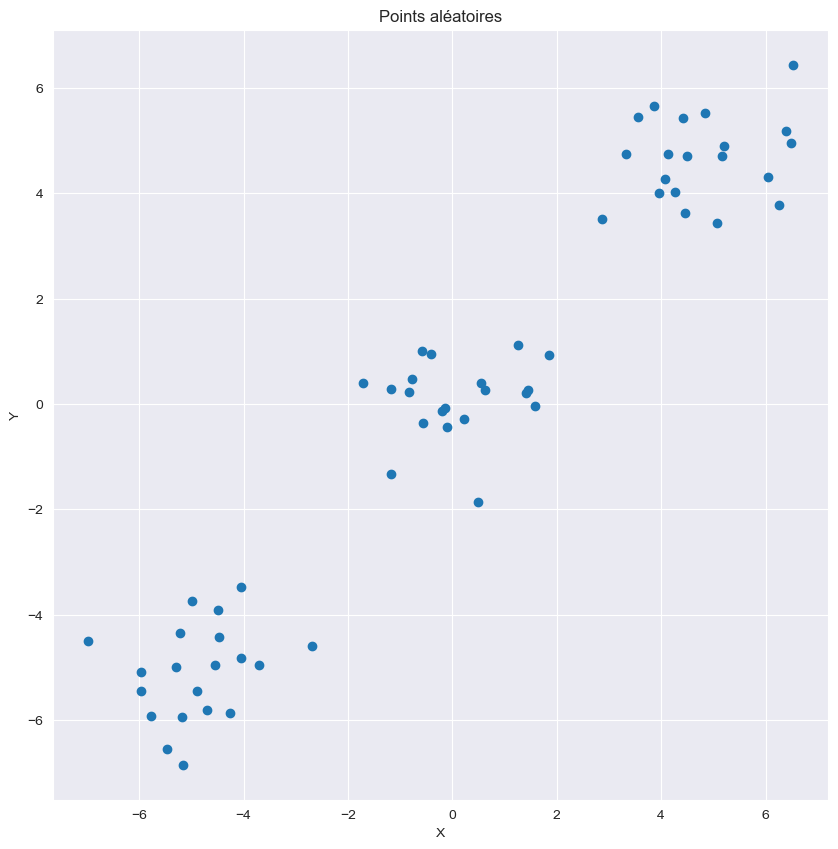

In [11]:
# 1. Generate the random points

import numpy as np

# Nombre de points par groupe
n_points = 20

# Centres des groupes
centers = [(0, 0), (5, 5), (-5, -5)]

# Générer des points autour de chaque centre
points = []
for center in centers:
    x_points = np.random.normal(center[0], 1, n_points)  # 1 est l'écart-type
    y_points = np.random.normal(center[1], 1, n_points)
    points.append(np.column_stack((x_points, y_points)))

# Fusionner tous les points en un seul tableau
points = np.vstack(points)

# Plot the points
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1])
plt.title("Points aléatoires")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

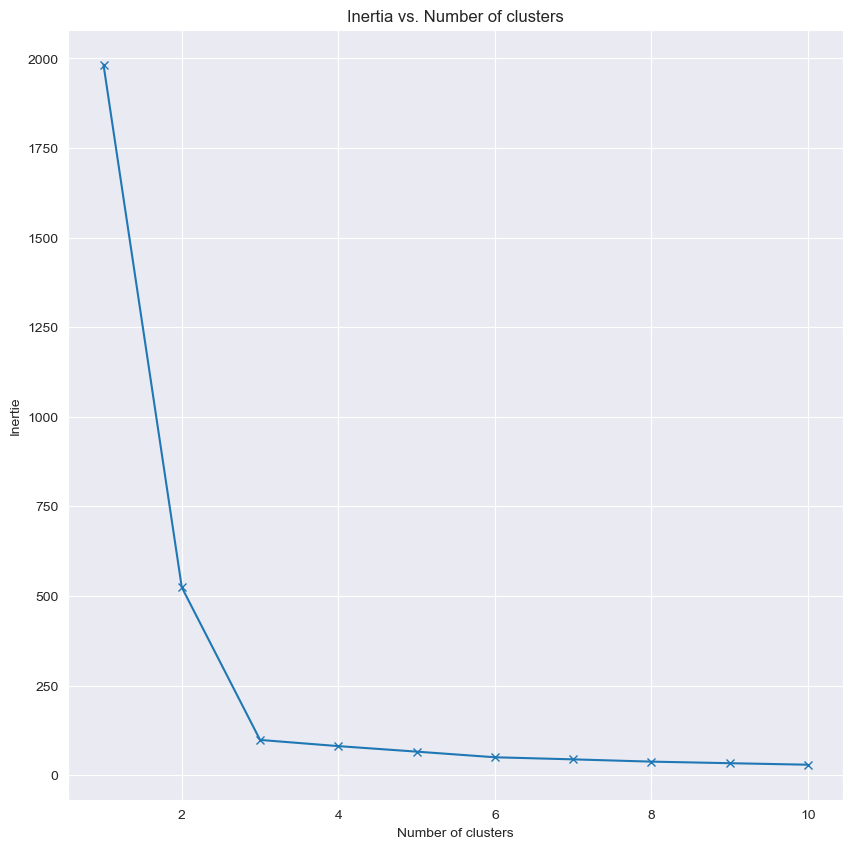

In [12]:
# 2. Program the algorithm that consists in executing multiple K-Means with different numbers of centers and displaying the best result.

from sklearn.cluster import KMeans


def range_kmeans(nb_cluster):
    # Exécuter K-Means avec différents nombres de centres
    inertia = []
    K = [i for i in range(1, nb_cluster + 1)]
    for k in K:
        kmeans_fct = KMeans(n_clusters=k, n_init=10)
        kmeans_fct.fit(points)
        inertia.append(kmeans_fct.inertia_)

    # Trouver le nombre optimal de clusters en utilisant la méthode du coude
    plt.figure(figsize=(10, 10))
    plt.plot(K, inertia, 'x-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertie')
    plt.title('Inertia vs. Number of clusters')
    plt.show()


range_kmeans(10)

We note that the optimal number of clusters is 3. Because the inertia decreases significantly from 1 to 3, then it decreases slightly from 3 to 10.

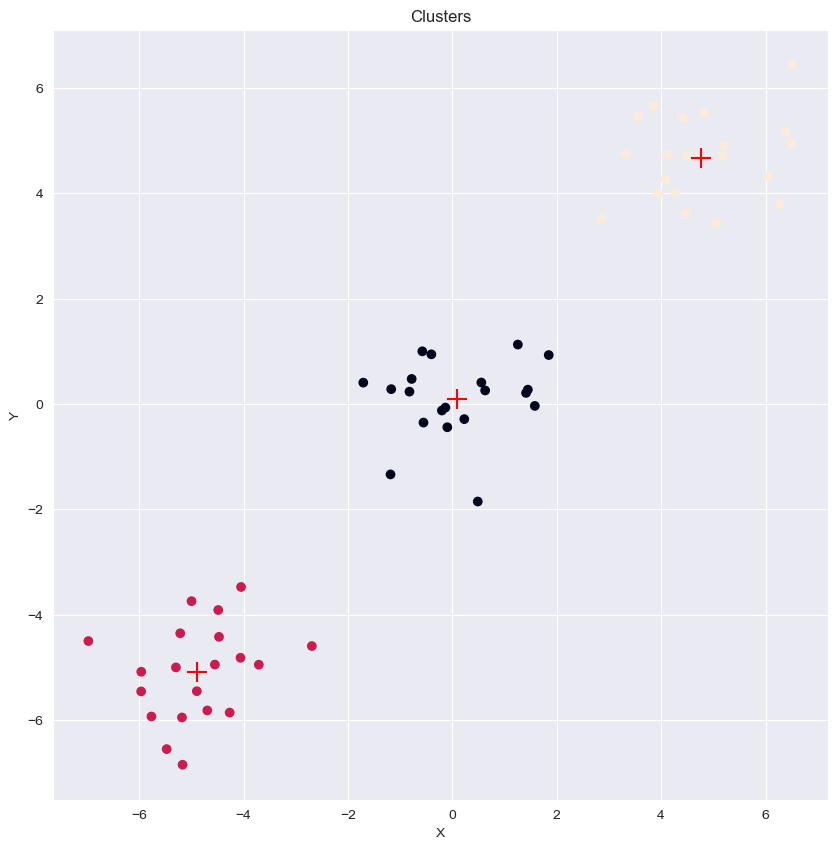

In [15]:
# 3. Show the best result

nb_best_cluster = 3
kmeans = KMeans(n_clusters=nb_best_cluster, n_init=10)
kmeans.fit(points)

# Plot the points
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='+', s=200)
plt.title("Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Exercise #3: Reinforcement Learning
In the problem of the arrows, n arrows are positioned vertically and oriented upwards or downwards. We want to swap the orientation of each arrow (see the figures below).

![2](./2.png)

We can modify a position with the two following cases:
- by swapping a sequence of three adjacent arrows having the same orientation (all upwards
or all downwards)
- by swapping two adjacent arrows having opposite orientations (one is upwards and the other
is downwards).
Questions:
1. Explain how you can define the MDP for this problem. Describe as clearly as possible how do you represent a state.
2. Program the environment using the template available on Moodle. You can modify it as you wish.
3. Give the optimal policy obtained by Q-Iteration for the initial state above.

1. Définition du MDP

Nous devons définir les éléments suivants (États, Actions, Récompenses, Transitions, Critère d'arrêt) :
__États :__

Un état peut être représenté par un tableau avec les lettres suivantes `+1` quand la fléche pointe vers le haut ou `-1` quand la flèche pointe vers le bas, où chaque élément représente une flèche orientée vers le haut ('↑') ou vers le bas ('↓'). Par exemple, l'état initial de notre problème peut être représenté par [1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1].

__Actions :__

Les deux types d'actions sont :
- Inverser une séquence de trois flèches consécutives de même orientation.
- Inverser deux flèches consécutives d'orientations opposées.

__Transitions :__

Les transitions d'état sont déterministes dans le cas présent, car on est soit en haut ou en bas (pas d'entre-deux possible). Chaque action conduit à un nouvel état de manière prévisible, si bas $\rightarrow$ haut, si haut $\rightarrow$ bas.

__Récompenses :__

La récompense sert à encourager l'atteinte de l'état où toutes les flèches sont orientées dans la direction opposée. Nous pouvons définir la récompense comme suit :
- -1 pour chaque action
- 0 pour l'état final ou plus

__Critère d'arrêt :__

Le jeu se termine lorsque toutes les flèches ont été retournées dans la direction opposée.

In [10]:
# 2. Program the environment using the template available on Moodle. You can modify it as you wish.

import itertools


class ArrowProblem:
    def __init__(self, n_arrows):
        self.n_arrows = n_arrows
        self.states = self.generate_states()

    def generate_states(self):
        return list(itertools.product([-1, 1], repeat=self.n_arrows))

    def state_space(self):
        return self.states

    def action_space(self, s):
        actions = []
        for i in range(self.n_arrows - 1):
            if s[i] != s[i + 1]:  # Renverser deux flèches adjacentes avec des orientations opposées
                actions.append((i, 2))
        for i in range(self.n_arrows - 2):
            if s[i] == s[i + 1] == s[i + 2]:  # Renverser trois flèches adjacentes avec la même orientation
                actions.append((i, 3))
        return actions

    def T(self, s, a):
        new_state = list(s)
        if a[1] == 2:  # Renverser deux flèches
            new_state[a[0]] = -s[a[0]]
            new_state[a[0] + 1] = -s[a[0] + 1]
        elif a[1] == 3:  # Renverser trois flèches
            new_state[a[0]] = -s[a[0]]
            new_state[a[0] + 1] = -s[a[0] + 1]
            new_state[a[0] + 2] = -s[a[0] + 2]
        return tuple(new_state)

    def R(self, s, a):
        return -1  # Récompense simple de -1 pour chaque action

In [13]:
# 3. Give the optimal policy obtained by Q-Iteration for the initial state above.

import numpy as np
import copy


class QIteration:
    def __init__(self, mdp, gamma=0.9, precision=1e-13):
        self.MDP = mdp
        self.gamma = gamma
        self.precision = precision
        self.Q = dict()

        nba = 0
        for s in self.MDP.state_space():
            nba = max(nba, len(self.MDP.action_space(s)))
        for s in self.MDP.state_space():
            self.Q[s] = np.zeros(nba)

    def run(self, N=-1):
        l = 0
        while l != N:
            l += 1
            oldQ = copy.deepcopy(self.Q)

            for s in self.MDP.state_space():
                for a_idx, a in enumerate(self.MDP.action_space(s)):
                    next_state = self.MDP.T(s, a)
                    self.Q[s][a_idx] = self.MDP.R(s, a) + self.gamma * np.max(self.Q[next_state])

            if N == -1 and all(np.linalg.norm(oldQ[s] - self.Q[s]) < self.precision for s in self.MDP.state_space()):
                print('QIteration has stopped after', l, 'iterations!')
                break

    def find_optimal_policy(self):
        policy = {}
        for s in self.MDP.state_space():
            possible_actions = self.MDP.action_space(s)
            if possible_actions:  # Vérifier s'il y a des actions possibles
                q_values = [self.Q[s][i] for i, _ in enumerate(possible_actions)]
                a_idx = np.argmax(q_values)
                policy[s] = possible_actions[a_idx]
            else:
                policy[s] = None
        return policy

In [16]:
# Créer une instance du problème des flèches
arrow_problem = ArrowProblem(n_arrows=3)

# Créer une instance de Q-Iteration
q_iteration = QIteration(arrow_problem)

# Effectuer la Q-Iteration
q_iteration.run()

# Trouver la politique optimale
optimal_policy = q_iteration.find_optimal_policy()

# Afficher la politique optimale pour quelques états
for state in arrow_problem.state_space()[:5]:
    print(f"État: {state}, Meilleure action: {optimal_policy[state]}")

[(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1), (1, -1, -1), (1, -1, 1), (1, 1, -1), (1, 1, 1)]
QIteration has stopped after 3 iterations!
État: (-1, -1, -1), Meilleure action: (0, 3)
État: (-1, -1, 1), Meilleure action: (1, 2)
État: (-1, 1, -1), Meilleure action: (0, 2)
État: (-1, 1, 1), Meilleure action: (0, 2)
État: (1, -1, -1), Meilleure action: (0, 2)


In [ ]:
# Pour notre problème initial avec 11 flèches, nous pouvons afficher la politique optimale pour chaque état : 

arrow_problem = ArrowProblem(n_arrows=110)

# Créer une instance de Q-Iteration
q_iteration = QIteration(arrow_problem)

# Effectuer la Q-Iteration
q_iteration.run()

# Trouver la politique optimale
optimal_policy = q_iteration.find_optimal_policy()

# Afficher la politique optimale pour quelques états
for state in arrow_problem.state_space()[:5]:
    print(f"État: {state}, Meilleure action: {optimal_policy[state]}")